In [37]:
from numpy import *
import os
#from pylab import *
import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib.cbook as cbook
import time
from scipy.misc import imread
from scipy.misc import imresize
import matplotlib.image as mpimg
from scipy.ndimage import filters
import urllib
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# X = np.load('./bvlc_alexnet.npy', mmap_mode='r')
net_data = load(open("bvlc_alexnet.npy", "rb"), encoding="latin1").item()
print net_data.keys()

net_data["fc8"][0].shape
a=net_data["fc8"][0]
# net_data["conv1"][0].shape
# net_data["conv1"][0]

U, s, V = np.linalg.svd(a, full_matrices=False)
print U.shape
S=np.diag(s)


[u'fc6', u'fc7', u'fc8', u'conv3', u'conv2', u'conv1', u'conv5', u'conv4']


(4096, 1000)

(4096, 1000)


In [45]:
U, s, V = np.linalg.svd(a, full_matrices=False)
def SVD_Custom(U,s,V,a,k):
    S=np.diag(s)
    S=S[np.ix_(arange(k),arange(k))]
    U=U[np.ix_(arange(U.shape[0]),arange(k))]
    V=V[:k]
    A=np.dot(np.dot(U,S),V)
    if k==1:
        print A-a 
    Norm=np.linalg.norm(A-a)
    return Norm


[[-0.0168666  -0.01653733  0.00425602 ..., -0.01142243 -0.00261313
  -0.00154842]
 [-0.01216605 -0.00451211 -0.00899448 ...,  0.00151228  0.01173465
   0.00850069]
 [ 0.01019611 -0.00398413  0.00816927 ...,  0.00189829 -0.00756291
  -0.00190332]
 ..., 
 [-0.00945242  0.02095327 -0.00640029 ..., -0.00486274 -0.01395431
   0.00900442]
 [ 0.00972705  0.0088059   0.014521   ...,  0.01306662  0.00708947
  -0.00498037]
 [-0.00577502  0.00882816  0.00427127 ..., -0.023031   -0.02006461
   0.00520852]]


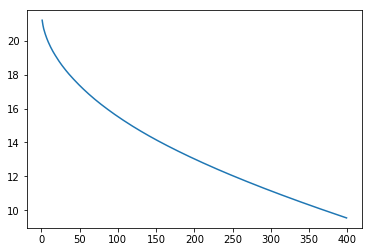

In [46]:
norm=[]
for i in xrange(1,400):
    norm.append(SVD_Custom(U,s,V,a,i))
plt.plot(xrange(1,400),norm)


In [44]:
print norm[0]

21.2081
